## 1. Perceptron nguyên thuỷ(Binary classifier)
<img src="images/perceptron.png" alt="perceptron" width="900">

1 Perceptron có thể giải quyết được các vấn đề đơn giản như classification,..


Được giới thiệu bởi Frank Rosenblatt năm 1957



### Xây dựng 1 perceptron, 2 ngõ vào, 1 bias, 1 output với các trọng số ngẫu nhiên
- Kiểm tra dấu của ngõ ra trên R2
- Thay đổi trọng số và kiểm tra sự thay đổi của dấu trên R2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

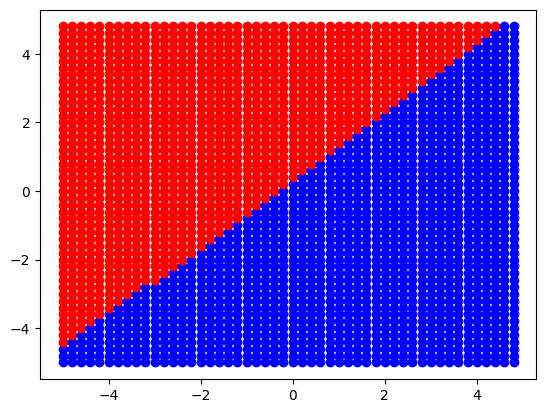

In [2]:

w = np.random.random((3,1)) -.5
def perceptron(x,w):
    xx=np.vstack((np.array([[1]]),x))
    y=w.T @ xx  # @ là tích vô hướng(dot produce)
    if y>0:
        return 1
    else:
        return 0

for x1 in np.arange(-5,5,.2):
    for x2 in np.arange(-5,5,.2):
        
        x = np.array([[x1,x2]]) # Thêm ngoặc để chuyển vị 
        x=x.T #Chuyển vị ma trận X

        a = perceptron(x,w)
        if a==1:
            plt.plot(x1,x2,'bo')
        else:
            plt.plot(x1,x2,'ro')


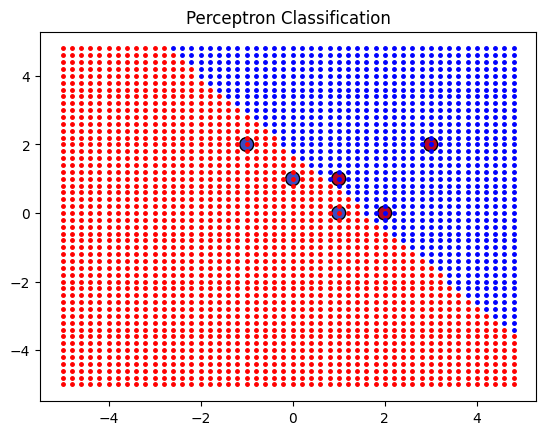

In [3]:
# Dữ liệu huấn luyện
X_train = np.array([[-1,2],
                    [1, 0], 
                    [0, 1],
                    [2, 0] ,
                    [1, 1], 
                    [3, 2]])  # Các điểm dữ liệu
y_train = np.array([0, 0, 0, 1, 1, 1])  # Nhãn mong muốn

# Thêm bias vào X_train
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Thêm cột 1 cho bias

# Hàm huấn luyện Perceptron
def train_perceptron(X_train, y_train, w, learning_rate =0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            x = X_train[i].reshape(-1, 1)  # Chuyển đổi x thành cột vector
            y_pred = perceptron(x[1:], w)  # Bỏ bias khi truyền vào hàm perceptron
            if y_pred != y_train[i]:  # Cập nhật trọng số khi phân loại sai
                w = w + learning_rate*(y_train[i] - y_pred) * x
    return w

# Huấn luyện Perceptron
w = train_perceptron(X_train_bias, y_train, w)

# Vẽ đồ thị phân loại
for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([[x1, x2]])  # Tạo điểm dữ liệu
        x = x.T  # Chuyển vị ma trận x
        a = perceptron(x, w)
        if a == 1:
            plt.plot(x1, x2, 'bo', markersize=2.5)  # Điểm lớp 1
        else:
            plt.plot(x1, x2, 'ro', markersize=2.5)  # Điểm lớp 0

# Vẽ các điểm huấn luyện
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=100)
plt.title('Perceptron Classification')
plt.show()

## 2. Perceptron cải tiến (multi-label classifier)

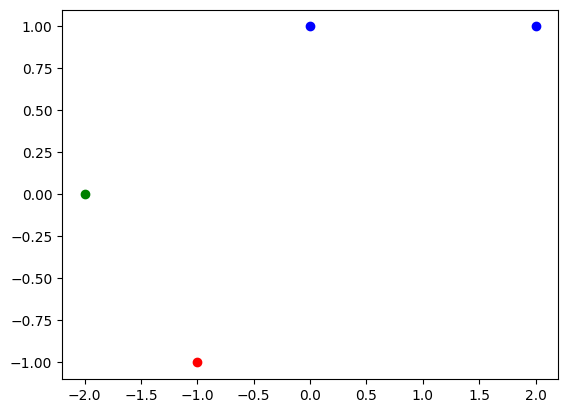

In [ ]:
def perceptron_multi(X,W):
    X=np.array([X])
    X=X.T
    xx = np.vstack((X, np.array([[1]]))) # thêm số 1 vào cột cuối hay còn gọi là bias để đường tuyến tính xa rời gốc toạ độ
    y=W @ xx  # @ là tích vô hướng(dot produce)
    return y

X = np.array([[-1, -1], 
              [-2, 0], 
              [0, 1], 
              [2, 1] ]) 
t = np.array([0, 1, 2, 2])
W = np.array([[0,-1,0], 
              [1, 1, 0], 
              [0, 1,0]]) 

color = 'rgb'
plt.figure()

for i in range(X.shape[0]):
    plt.plot(X[i,0], X[i,1], color[t[i]]+'o' )


In [5]:
epoch = 3
count = 0
for _ in range(epoch):
    for i in np.arange(X.shape[0]):
        out = perceptron_multi(X[i],W) # Tính toán đầu ra
        xx = np.vstack((np.array([X[i]]).T, np.array([[1]]))) # thêm số 1 vào cột cuối
        flag = 'D'

        if np.argmax(out) != t[i]:
            flag = 'S'
            W[t[i]] = W[t[i]]+ xx.T

            for k in range(W.shape[0]):
                if out[k] == max(out):
                    W[k] =W[k]- xx.T

        print(W[0], W[1], W[2], '[X', i+1, 'L', t[i]+1,']', xx.T[0], out.T, flag)

        if flag =='D': count = count +1
        else: count = 0
        if count == 4: break
    if count == 4: break

[ 0 -1  0] [1 1 0] [0 1 0] [X 1 L 1 ] [-1 -1  1] [[ 1 -2 -1]] D
[ 2 -1 -1] [-1  1  1] [ 2  1 -1] [X 2 L 2 ] [-2  0  1] [[ 0 -2  0]] S
[ 2 -1 -1] [-1  0  0] [2 2 0] [X 3 L 3 ] [0 1 1] [[-2  2  0]] S
[ 2 -1 -1] [-1  0  0] [2 2 0] [X 4 L 3 ] [2 1 1] [[ 2 -2  6]] D
[ 1 -2  0] [ 0  1 -1] [2 2 0] [X 1 L 1 ] [-1 -1  1] [[-2  1 -4]] S
[ 1 -2  0] [ 0  1 -1] [2 2 0] [X 2 L 2 ] [-2  0  1] [[-2 -1 -4]] D
[ 1 -2  0] [ 0  1 -1] [2 2 0] [X 3 L 3 ] [0 1 1] [[-2  0  2]] D
[ 1 -2  0] [ 0  1 -1] [2 2 0] [X 4 L 3 ] [2 1 1] [[0 0 6]] D
[ 1 -2  0] [ 0  1 -1] [2 2 0] [X 1 L 1 ] [-1 -1  1] [[ 1 -2 -4]] D


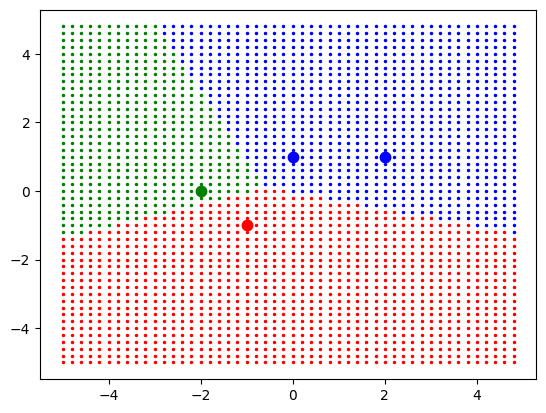

In [6]:
# VẼ ĐỒ THỊ PHÂN LOẠI 2D

plt.figure()
for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([x1, x2])
        out = perceptron_multi(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1,x2,color[label]+'.',markersize=3)  # Vẽ điểm dự đoán

for i in range(X.shape[0]):
    plt.plot(X[i,0], X[i,1], color[t[i]]+'.',markersize = 15) # Vẽ các điểm huấn luyện


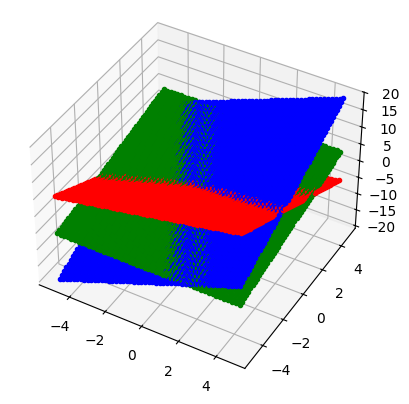

In [7]:
# Vẽ đồ thị phân loại 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, -60)  # Thiết lập góc nhìn 3D

for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([x1, x2])
        out = perceptron_multi(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1,x2,out[0],'r.')
        plt.plot(x1,x2,out[1],'g.')
        plt.plot(x1,x2,out[2],'b.')
plt.show()

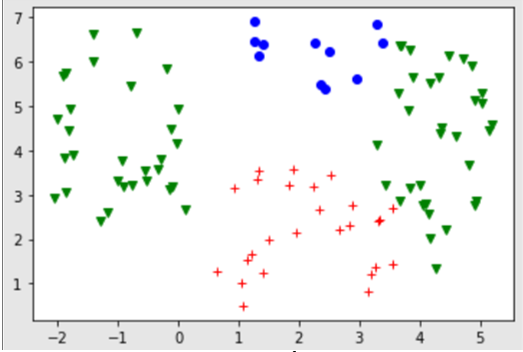
- <b>Dữ liệu không tác bằng đường tuyến tính</b>: Thay vì dùng mặt phẳng(tuyến tính) để phân biệt các vùng dữ liệu thì khi xuất hiện những điểm ngoại lai khó có thể kiểm soát, thay vào đó có thể sử dụng mặt phẳng cong để linh hoạt hơn trong việc phân loại


- <b>Dữ liệu phân tách bằng đường biên phi tuyến được không: </b> Thêm các kernel như x1^2, x1*x2,... vào input ban đầu x1, x2